# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
#Still need to complete plot for 1, both parts of 2, and second part of 3

import numpy as np
import math

def altitude(T):
    #code here
    G = 6.67*10**(-11)
    M = 5.97*10**24
    R = 6.371*10**6 #meters
    
    h = (((G*M*(T)**2)/(4*math.pi**2))**(1/3))-R
    return h

T = int(input("Input an orbital period: "))
print("The altitude is",altitude(T))

Input an orbital period: 14400
The altitude is 6417564.675466765


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [4]:
G = 6.67*10**(-11)
M = 5.97*10**24
R = 6.371*10**6 #meters

geosync = 3600*24
hourhalf = 5400
min45 = 2700
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

#A 45 minute orbit is not possible with this formula, given the negative value of altitude.

24 hours: Altitude = 35855910.17617497 ; 90 min: Altitude = 279321.62537285965 ;  45 min: Altitude = -2181559.8978108233


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [5]:
persidereal = 3600*23.93
print("24 hours: Altitude =",altitude(geosync), "; Sidereal Day: Altitude =",altitude(persidereal))

print('A sidereal day is the amount of time it takes for stars other than the Sun to return to the same position in the sky. A geosynchronous satellite orbits', altitude(geosync)-altitude(persidereal), 'meters closer to Earth.')

24 hours: Altitude = 35855910.17617497 ; Sidereal Day: Altitude = 35773762.329895645
A sidereal day is the amount of time it takes for stars other than the Sun to return to the same position in the sky. A geosynchronous satellite orbits 82147.8462793231 meters closer to Earth.


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labeled axes.  Plot orbits with height below 0 as red, and plots positive heights with times less than geosynchronous in blue and those longer in green.

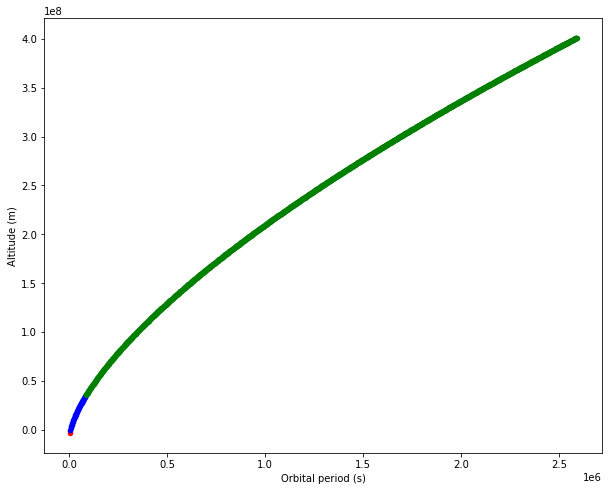

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#Your code here
t = np.arange(0.5*3600, 720*3600, 0.5*3600) #in seconds from .5 hours to 30 days
h = altitude(t) #For simplicity

#Plot time t vs altitude h
#NOTE: I removed this from the modified code so that one plot with all colors and all data is generated.
#fig = plt.figure(figsize=(10,8))
#ax = fig.add_subplot(111)
#ax.scatter(t,h,s=20,c='blue')

#Masking

negative_orbit = 0
sidereal_orbit = 35773762.329895645

mask_negative = h <= negative_orbit
mask_normal = (negative_orbit <= h) & (h < sidereal_orbit) #Word 'and' does not work. Must be an ampersand
mask_sidereal = h >= sidereal_orbit

fig, ax = plt.subplots(figsize=(10, 8)) #Numbers for figsize must be in parentheses to avoid syntax error
ax.scatter(t[mask_negative], h[mask_negative], color='red', label='Negative orbital distance', s=20)
ax.scatter(t[mask_normal], h[mask_normal], color='blue', label='Orbital period within sidereal day', s=20)
ax.scatter(t[mask_sidereal], h[mask_sidereal], color='green', label='Longer orbital period than sidereal day', s=20)

#Labels
ax.set_xlabel('Orbital period (s)')
ax.set_ylabel('Altitude (m)')

plt.show()

#t2 = np.ma.masked_where(t, altitude(t)>0)
#mask1 = y > 0
#plt.plot(t[mask1], altitude(t)[mask1], 'blue') WRONG OUTPUT

# Create the base plot
#plt.plot(x, y, 'b')

# Plot a new color over the masked region


#Mask to get colors for correct h ranges

#Geosynchronous altitude: 35855910.17617497 m

#if altitude(t) > 35855910.17617497: 
#    fig = plt.figure(figsize=(10,8))
#    ax = fig.add_subplot(111)
#    ax.scatter(t,altitude(t),s=20,c='green')
#    
#elif altitude(t) < 0: 
#    color = 'red'
#    
#else: 
#    color = 'blue'

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [17]:
def relativity(x, beta): 
    #code here
    c = 2.9979*(10**8)
    #beta= v/c
    gamma = 1/((1-beta**2)**(1/2))
    t = x/(beta) #Observer's frame/rest frame
    tnew = gamma*(t-((beta*x)/c)) #Moving frame/spaceship frame. Need to make a correction so that tprime<t.
    tprime = t*(t/tnew) #Correct tprime.
    
    return t, tprime

x = float(input("Input a distance in light years: "))
beta = float(input("Input a velocity as a fraction of the speed of light: "))
print("The time in years is",relativity(x, beta))

#Fix mathematical error for tprime to get correct answer.

Input a distance in light years: 100000
Input a velocity as a fraction of the speed of light: .999999999
The time in years is (100000.00009999999, 4.472135911148955)


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [15]:
def relativity(x, beta1): 
    #code here
    c = 2.9979*(10**8)
    #beta= v/c
    gamma = 1/((1-beta1**2)**(1/2))
    t1 = x/(beta1) #Observer's frame/rest frame
    tnew1 = gamma*(t-((beta1*x)/c)) #Moving frame/spaceship frame. Need to make a correction so that tprime<t.
    tprime1 = t1*(t1/tnew1) #Correct tprime.
    
    return t1, tprime1

x = float(input("Input a distance in light years: "))
beta1 = float(input("Input a velocity as a fraction of the speed of light: "))

def relativity(y, beta2): 
    #code here
    c = 2.9979*(10**8)
    #beta= v/c
    gamma = 1/((1-beta2**2)**(1/2))
    t2 = y/(beta2) #Observer's frame/rest frame
    tnew2 = gamma*(t-((beta2*y)/c)) #Moving frame/spaceship frame. Need to make a correction so that tprime<t.
    tprime2 = t2*(t2/tnew2) #Correct tprime.
    
    return t2, tprime2

y = float(input("Input a distance in light years: "))
beta2 = float(input("Input a velocity as a fraction of the speed of light: "))

def relativity(z, beta3): 
    #code here
    c = 2.9979*(10**8)
    #beta= v/c
    gamma = 1/((1-beta3**2)**(1/2))
    t3 = z/(beta3) #Observer's frame/rest frame
    tnew3 = gamma*(t3-((beta*z)/c)) #Moving frame/spaceship frame. Need to make a correction so that tprime<t.
    tprime3 = t3*(t3/tnew3) #Correct tprime.
    
    return t3, tprime3

z = float(input("Input a distance in light years: "))
beta3 = float(input("Input a velocity as a fraction of the speed of light: "))

print("The time in years at v = 0.90 c is",relativity(x, beta1))
print("The time in years at v = 0.98 c is",relativity(y, beta2))
print("The time in years at v = 0.999 c is",relativity(z, beta3))

Input a distance in light years: 10
Input a velocity as a fraction of the speed of light: 0.90
Input a distance in light years: 10
Input a velocity as a fraction of the speed of light: 0.98
Input a distance in light years: 10
Input a velocity as a fraction of the speed of light: 0.999
The time in years at v = 0.90 c is (11.11111111111111, 4.8432210556484465)
The time in years at v = 0.98 c is (10.204081632653061, 2.0305866096589913)
The time in years at v = 0.999 c is (10.01001001001001, 0.4475493281953014)


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [52]:
def quadratic(a, b, c):
    #code here
    x1 = (-b+(((b**2)-4*a*c)**(1/2)))/(2*a)
    x2 = (-b-(((b**2)-4*a*c)**(1/2)))/(2*a)
    return x1, x2

a = float(input("Input a coefficient for x^2: "))
b = float(input("Input a coefficient for x: "))
c = float(input("Input a c-value: "))
print("The solutions are",quadratic(a, b, c))

#Correct output

Input a coefficient for x^2: .001
Input a coefficient for x: 1000
Input a c-value: .001
The solutions are (-9.999894245993346e-07, -999999.999999)


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [73]:
def quadraticprime1(a, b, c):
    #code here
    xprime1 = ((-b+(((b**2)-4*a*c)**(1/2)))/(2*a))*(-b-(((b**2)-4*a*c)**(1/2))) #Multiplies numerator and denominator
    xprime2 = ((-b-(((b**2)-4*a*c)**(1/2)))/(2*a))*(-b+(((b**2)-4*a*c)**(1/2))) #Does not yield same x-values as original quadratic formula
    return xprime1, xprime2

def quadraticprime2(a, b, c):
    #code here
    xprime1 = 2*c/(-b-((b**2)-4*a*c)**(1/2))
    xprime2 = 2*c/(-b+((b**2)-4*a*c)**(1/2))
    return xprime1, xprime2

a = float(input("Input a coefficient for x^2: "))
b = float(input("Input a coefficient for x: "))
c = float(input("Input a c-value: "))
print("The solutions for the first alternative quadratic equation are",quadraticprime1(a, b, c))
print("The solutions for the second alternative quadratic equation are",quadraticprime2(a, b, c))
print("The original quadratic formula and the final equation yield basically the same solution. Therefore, the math to prove the correlation between these formulas is correct.")

Input a coefficient for x^2: .001
Input a coefficient for x: 1000
Input a c-value: .001
The solutions for the first alternative quadratic equation are (0.001999978849196669, 0.001999978849196669)
The solutions for the second alternative quadratic equation are (-1.000000000001e-06, -1000010.5755125057)
The original quadratic formula and the final equation yield basically the same solution. Therefore, the math to prove the correlation between these formulas is correct.


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__